<a href="https://colab.research.google.com/github/ingrydk/programacao_para_engenharia_eletrica/blob/main/Pandas_Aula_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df1 = pd.read_excel("/content/drive/MyDrive/Cusro_Python_Pandas_Digital_Innovation-master/datasets/Aracaju.xlsx")
df2 = pd.read_excel("/content/drive/MyDrive/Cusro_Python_Pandas_Digital_Innovation-master/datasets/Fortaleza.xlsx")
df3 = pd.read_excel("/content/drive/MyDrive/Cusro_Python_Pandas_Digital_Innovation-master/datasets/Natal.xlsx")
df4 = pd.read_excel("/content/drive/MyDrive/Cusro_Python_Pandas_Digital_Innovation-master/datasets/Recife.xlsx")
df5 = pd.read_excel("/content/drive/MyDrive/Cusro_Python_Pandas_Digital_Innovation-master/datasets/Salvador.xlsx")

In [ ]:
df = pd.concat([df1,df2,df3,df4,df5]) #concatenando os dfs

In [ ]:
df.sample(2) #pega amostras randomicas

,Cidade,Data,Vendas,LojaID,Qtde
49,Aracaju,2018-01-01,53.74,1522,3
9,Aracaju,2019-01-01,149.36,1523,3


In [ ]:
df.dtypes

,0
Cidade,object
Data,datetime64[ns]
Vendas,float64
LojaID,int64
Qtde,int64


In [ ]:
#como alterar um tipo de dado de uma determinada coluna
df['LojaID'] = df['LojaID'].astype('object') #estamos mudando pq ele n precisa ficar como inteiro ja q nao faremos calculos

In [ ]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


#Tratando valores faltantes

In [ ]:
#verificando linhas com valores faltantes
df.isnull().sum()
#ele soma as quantidades de valores faltantes

,0
Cidade,0
Data,0
Vendas,0
LojaID,0
Qtde,0


In [ ]:
df["Vendas"].mean()

122.61180089485458

In [ ]:
#Substituindo valores nulos pela média
df['Vendas'].fillna(df['Vendas'].mean(), inplace=True) # inplace=True substitui os valores em memória

In [ ]:
df["Vendas"].mean()

122.61180089485458

In [ ]:
df.isnull().sum() #verifica se deu certo mesmo

,0
Cidade,0
Data,0
Vendas,0
LojaID,0
Qtde,0


In [ ]:
#OUTRA OPÇÃO
#Substitui os valores nulos por zero
df["LojaID"].fillna(0, inplace=True)

In [ ]:
#OUTRA OPÇÃO
#Apaga as linhas com valores nulos
df.dropna(inplace=True)

In [ ]:
#Apagando as linhas com valores nulos com base apenas em 1 coluna
df.dropna(subset=["Vendas"], inplace=True)

In [ ]:
#Removendo linhas que estejam com valores faltantes em todas as colunas
df.dropna(how="all", inplace= True)

# Criando colunas novas

In [ ]:
df["Receita"] = df["Vendas"].mul(df["Qtde"]) #criando a coluna receita

In [ ]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [ ]:
#verificando qual a maior receita
df["Receita"].max()

3544.0

In [ ]:
#menor receita
df["Receita"].min()

3.34

In [ ]:
#nlargest
df.nlargest(3, "Receita") #3 linhas com maiores receitas

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
51,Natal,2018-01-21,859.0,852,4,3436.0
55,Natal,2019-01-08,859.0,854,4,3436.0


In [ ]:
#nsmallest
df.nsmallest(3, "Receita") #3 linhas com menores receitas

,Cidade,Data,Vendas,LojaID,Qtde,Receita
118,Aracaju,2018-01-01,3.34,1522,1,3.34
65,Recife,2019-01-01,4.01,981,1,4.01
92,Natal,2019-01-02,4.57,1035,1,4.57


In [ ]:
#agrupamento por cidade (retornando as receitas por cidade)
df.groupby("Cidade")["Receita"].sum()

,Receita
Cidade,
Aracaju,48748.25
Fortaleza,37913.97
Natal,167227.52
Recife,51936.51
Salvador,40596.73


In [ ]:
#ordena o conjunto de dados
#ordenando as 10 maiores receitas
df.sort_values("Receita", ascending=False).head(10) #ascending=False trás do maior para o menor

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
55,Natal,2019-01-08,859.0,854,4,3436.0
51,Natal,2018-01-21,859.0,852,4,3436.0
30,Natal,2018-10-02,856.0,853,4,3424.0
41,Natal,2018-05-20,835.0,852,4,3340.0
38,Natal,2018-02-25,828.0,852,4,3312.0
10,Natal,2018-10-27,828.0,852,4,3312.0
69,Natal,2019-03-24,817.0,852,4,3268.0
62,Natal,2018-02-10,793.0,854,4,3172.0
52,Natal,2018-04-27,778.0,854,4,3112.0


# Trabalhando com datas

In [ ]:
#transforma a coluna de data em tipo inteiro, para aprender a tansformar em datas caso pegue uma sem tipo data
df["Data"] = df["Data"].astype("int64")

In [ ]:
#verificando se a transformação foi feita
df.dtypes

,0
Cidade,object
Data,int64
Vendas,float64
LojaID,object
Qtde,int64
Receita,float64


In [ ]:
#tranforma a coluna "Data" que está em inteiro para o formato de data
df["Data"] = pd.to_datetime(df["Data"])

In [ ]:
#verificando se a tranformação foi feita
df.dtypes

,0
Cidade,object
Data,datetime64[ns]
Vendas,float64
LojaID,object
Qtde,int64
Receita,float64


In [ ]:
#vamos verificar qual a receita por ano
#primeiro faremos um agrupamento
df.groupby(df["Data"].dt.year)["Receita"].sum() #o dt.year quer dizer vá na minha data e extraia apenas o ano

,Receita
Data,
2018,118176.53
2019,228246.45


In [ ]:
#criando uma nova coluna com o ano
df["Ano_Venda"]= df["Data"].dt.year #para criar uma coluna eu passo df["nome_da_coluna"]=

In [ ]:
df.sample(5) #pegando 5 amostras do nosso df

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda
18,Aracaju,2018-01-01,32.14,1522,6,192.84,2018
23,Recife,2019-01-01,37.51,982,2,75.02,2019
152,Natal,2019-01-02,20.07,1035,1,20.07,2019
81,Natal,2019-04-02,564.00,854,2,1128.00,2019
21,Salvador,2019-01-01,39.72,1035,3,119.16,2019


In [ ]:
#extraindo o mês e o dia e criando colunas deles
df["mes_venda"], df["dia_venda"] = (df["Data"].dt.month, df["Data"].dt.day)

In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,mes_venda,dia_venda
168,Natal,2019-01-02,20.22,1036,1,20.22,2019,1,2
129,Fortaleza,2019-03-02,35.34,982,7,247.38,2019,3,2
59,Natal,2018-01-15,369.00,853,2,738.00,2018,1,15
39,Aracaju,2018-01-01,11.11,1522,8,88.88,2018,1,1
16,Aracaju,2018-01-01,37.68,1522,10,376.80,2018,1,1


In [ ]:
#data mais antiga
df["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [ ]:
#calcula diferença de dias
df["diferenca_dias"] = df["Data"]-df["Data"].min()

In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,mes_venda,dia_venda,diferenca_dias
56,Fortaleza,2019-01-01,18.43,1002,1,18.43,2019,1,1,365 days
174,Salvador,2019-01-02,35.30,1037,1,35.30,2019,1,2,366 days
165,Natal,2019-01-02,11.54,1037,1,11.54,2019,1,2,366 days
108,Natal,2019-01-02,11.72,1037,1,11.72,2019,1,2,366 days
176,Salvador,2019-01-02,19.42,1035,3,58.26,2019,1,2,366 days


In [ ]:
#criando coluna  de trimestre
df["trimestre_venda"]=df["Data"].dt.quarter

In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,mes_venda,dia_venda,diferenca_dias,trimestre_venda
75,Recife,2019-01-01,170.29,981,8,1362.32,2019,1,1,365 days,1
108,Salvador,2019-03-02,11.72,1037,1,11.72,2019,3,2,425 days,1
19,Fortaleza,2019-01-01,18.86,1002,3,56.58,2019,1,1,365 days,1
128,Fortaleza,2019-03-02,38.70,982,4,154.80,2019,3,2,425 days,1
68,Recife,2019-01-01,175.45,980,3,526.35,2019,1,1,365 days,1


In [ ]:
df["Data"].dt.year.min()

2018

In [ ]:
#filtrando as vendas do ano mais antigo no mes de setembro
vendas_9_2018 = df.loc[(df["Data"].dt.year == 2018) & (df["Data"].dt.month == 9)]
vendas_9_2018

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,mes_venda,dia_venda,diferenca_dias,trimestre_venda
13,Natal,2018-09-12,458.0,852,4,1832.0,2018,9,12,254 days,3
48,Natal,2018-09-20,676.0,852,4,2704.0,2018,9,20,262 days,3
61,Natal,2018-09-11,724.0,853,2,1448.0,2018,9,11,253 days,3


# Visualização de Dados

In [ ]:
df["LojaID"].value_counts(ascending=False)

,count
LojaID,
1036,117
1035,112
1037,101
1034,67
983,65
982,44
1522,41
1520,39
980,36


<Axes: xlabel='LojaID'>

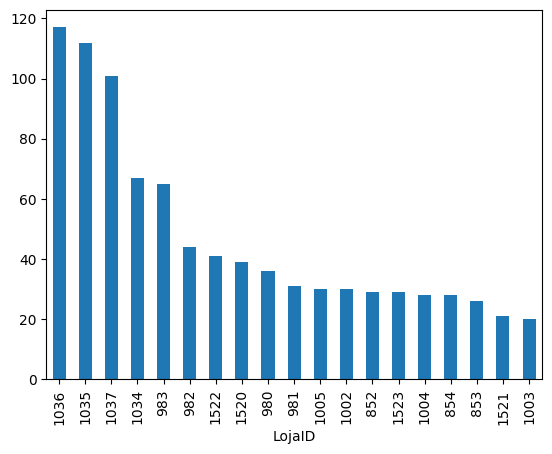

In [ ]:
#fazendo gráfico de barras
df["LojaID"].value_counts(ascending=False).plot.bar()
#se nao usar o ";" fica aparecendo  "  <Axes: xlabel='LojaID'>  "

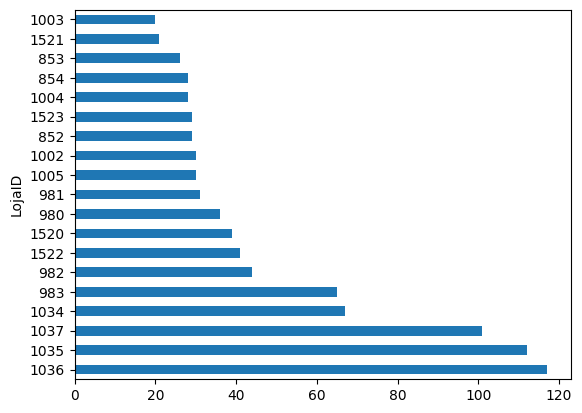

In [ ]:
#fazendo gráfico de barras horizontais
df["LojaID"].value_counts().plot.barh();

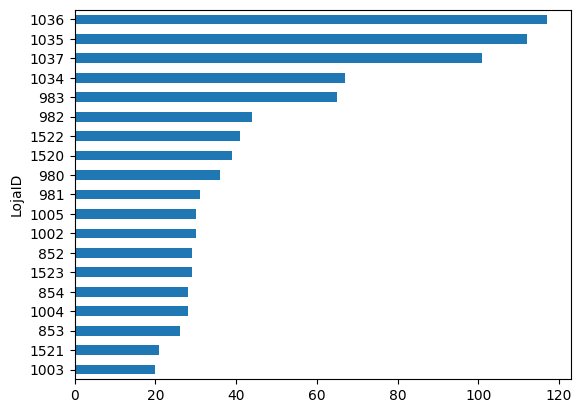

In [ ]:
#fazendo gráfico de barras horizontais
df["LojaID"].value_counts(ascending=True).plot.barh();

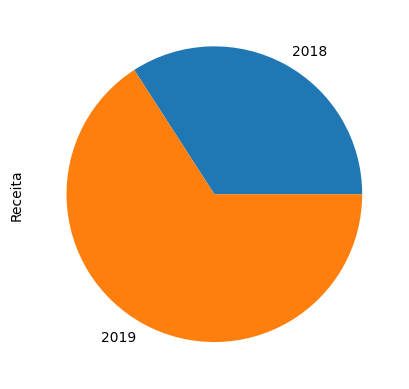

In [ ]:
#grafico de pizza
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie();

In [ ]:
#total de vendas por cidade
df["Cidade"].value_counts()

,count
Cidade,
Natal,240
Salvador,240
Fortaleza,142
Recife,142
Aracaju,130


Text(0.5, 0, 'Cidade')

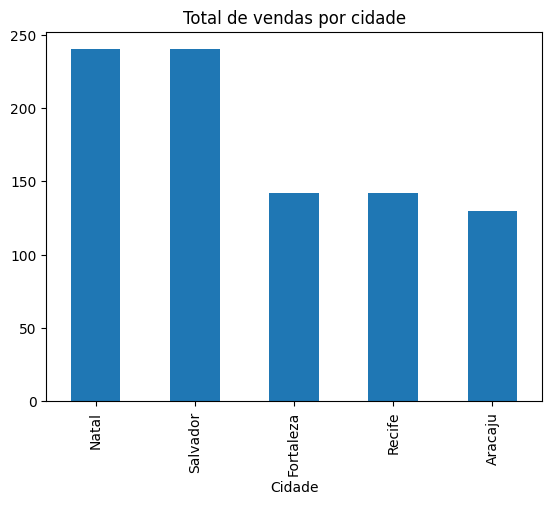

In [ ]:
#adicionando um título e alterando o nome dos eixos
import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar(title="Total de vendas por cidade")
plt.xlabel("Cidade")
